<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


 Gamma Correction pada Citra 
-----------------------------
Masukkan nilai Gamma: 3


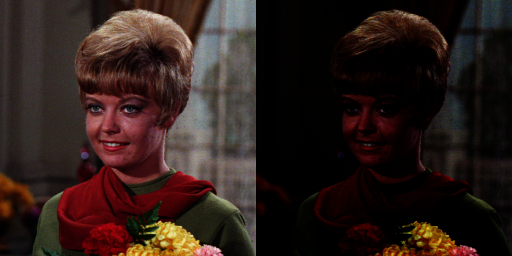

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
print(' Gamma Correction pada Citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/female.tiff')

# original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
gamma_image = gamma_correction(image,gamma)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)


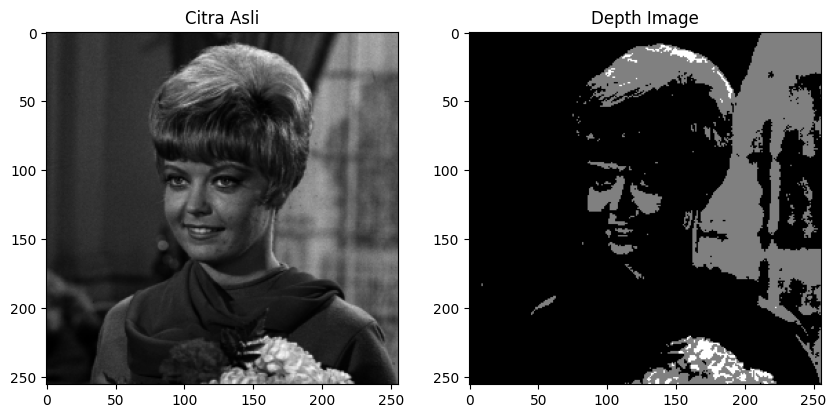

In [30]:
import cv2 as cv
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Parameter untuk bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Mengunggah citra
image_path = ('/content/drive/MyDrive/PCVK_MR/Images/female.tiff')  # Mengambil nama file pertama

# Membaca citra dalam grayscale
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Memeriksa apakah citra berhasil dimuat
if original is None:
    print("Error: Citra tidak ditemukan.")
else:
    # Membuat citra baru untuk kedalaman yang diproses
    depth_image = np.zeros(original.shape, original.dtype)

    # Mengubah kedalaman citra
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            depth_image[i, j] = int(original[i, j] / level)

    # Menampilkan citra asli dan citra yang telah diproses
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(original, cmap='gray')
    plt.axis('on')

    plt.subplot(1, 2, 2)
    plt.title('Depth Image')
    plt.imshow(depth_image, cmap='gray')
    plt.axis('on')

    plt.show()

In [41]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')  # PSNR tak terhingga jika tidak ada noise
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Fungsi untuk melakukan denoising
def average_denoising(images):
    denoised_images = []
    for original in images:
        denoised_image = cv.fastNlMeansDenoisingColored(original, None, 10, 7, 21)
        denoised_images.append(denoised_image)
    return denoised_images

# Membaca semua citra dari folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MR/Images/noises/*.jpg'):
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)

# Memastikan ada cukup citra untuk diproses
if len(cv_img) < 100:
    print("Jumlah citra tidak mencukupi. Jumlah citra yang tersedia:", len(cv_img))
else:
    # Mendapatkan citra untuk berbagai jumlah
    images_5 = cv_img[:5]
    images_20 = cv_img[:20]
    images_50 = cv_img[:50]
    images_100 = cv_img[:100]

    # Melakukan average denoising
    denoised_5 = average_denoising(images_5)
    denoised_20 = average_denoising(images_20)
    denoised_50 = average_denoising(images_50)
    denoised_100 = average_denoising(images_100)

    # Menghitung PSNR untuk masing-masing set
    psnr_results = {
        'Average 5 Citra': [],
        'Average 20 Citra': [],
        'Average 50 Citra': [],
        'Average 100 Citra': []
    }

    for i in range(len(images_5)):
        psnr_value = calculate_psnr(images_5[i], denoised_5[i])
        psnr_results['Average 5 Citra'].append(psnr_value)

    for i in range(len(images_20)):
        psnr_value = calculate_psnr(images_20[i], denoised_20[i])
        psnr_results['Average 20 Citra'].append(psnr_value)

    for i in range(len(images_50)):
        psnr_value = calculate_psnr(images_50[i], denoised_50[i])
        psnr_results['Average 50 Citra'].append(psnr_value)

    for i in range(len(images_100)):
        psnr_value = calculate_psnr(images_100[i], denoised_100[i])
        psnr_results['Average 100 Citra'].append(psnr_value)

    # Menampilkan PSNR
    for key, values in psnr_results.items():
        print(f"{key}: Rata-rata PSNR = {np.mean(values):.2f} dB")

Average 5 Citra: Rata-rata PSNR = 33.31 dB
Average 20 Citra: Rata-rata PSNR = 33.30 dB
Average 50 Citra: Rata-rata PSNR = 33.29 dB
Average 100 Citra: Rata-rata PSNR = 33.28 dB


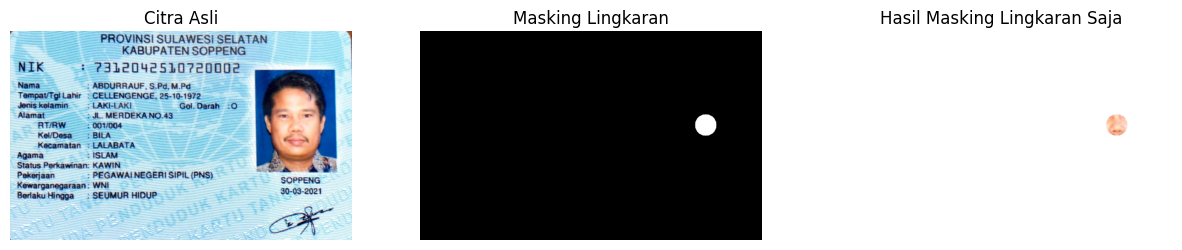

In [83]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to create a circular mask
def circular_mask(image, center=(0, 0), radius=None):
    if radius is None:
        radius = min(image.shape[:2]) // 4  # Default radius (1/4 of the smallest dimension)

    # Create a mask with the same size as the image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Draw a filled circle on the mask
    cv.circle(mask, center, radius, (255), thickness=-1)

    return mask

# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

# Define the center of the circle (x, y)
circle_center = (668, 219)  # Change these values as needed
circle_radius = 25 # Change the radius as needed

# Create a circular mask
mask = circular_mask(image, center=circle_center, radius=circle_radius)

# Create a new image to hold only the circular area
masked_area = cv.bitwise_and(image, image, mask=mask)

# Create a white background for better visualization
white_background = np.ones_like(image) * 255

# Combine the masked area with the white background
result_image = np.where(mask[:, :, np.newaxis] == 255, masked_area, white_background)

# Display original, circular mask, and result image
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

# Circular Mask
plt.subplot(1, 3, 2)
plt.title('Masking Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

# Resulting Image with Only Circular Area
plt.subplot(1, 3, 3)
plt.title('Hasil Masking Lingkaran Saja')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

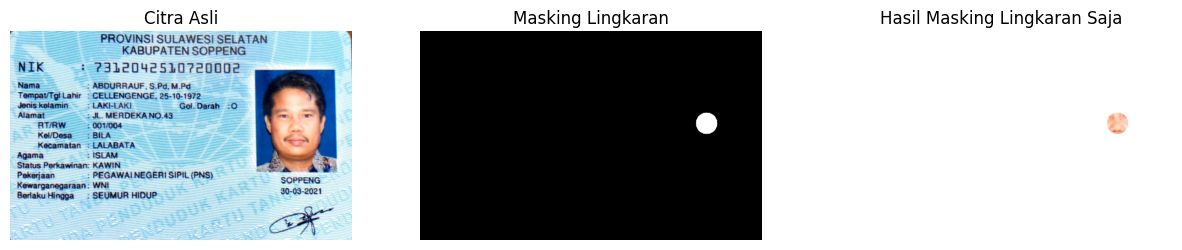

In [85]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function to create a circular mask
def circular_mask(image, center=(0, 0), radius=None):
    if radius is None:
        radius = min(image.shape[:2]) // 4  # Default radius (1/4 of the smallest dimension)

    # Create a mask with the same size as the image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    # Draw a filled circle on the mask
    cv.circle(mask, center, radius, (255), thickness=-1)

    return mask

# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

# Define the center of the circle (x, y)
circle_center = (670, 215)  # Change these values as needed
circle_radius = 25  # Change the radius as needed

# Create a circular mask
mask = circular_mask(image, center=circle_center, radius=circle_radius)

# Apply the mask using the bitwise AND operator
masked_area = cv.bitwise_and(image, image, mask=mask)

# Create a white background for better visualization
white_background = np.ones_like(image) * 255

# Combine the masked area with the white background
result_image = np.where(mask[:, :, np.newaxis] == 255, masked_area, white_background)

# Display original, circular mask, and result image
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

# Circular Mask
plt.subplot(1, 3, 2)
plt.title('Masking Lingkaran')
plt.imshow(mask, cmap='gray')
plt.axis('off')

# Resulting Image with Only Circular Area
plt.subplot(1, 3, 3)
plt.title('Hasil Masking Lingkaran Saja')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

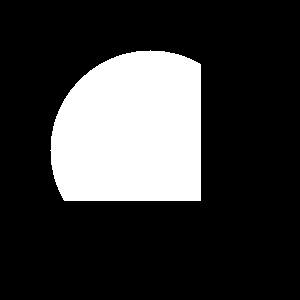

In [110]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

rectangle = np.zeros((300,300),dtype="uint8")
cv2.rectangle(rectangle, (25,25),(200,200),255,-1)


circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 100, 255, -1)

bitwise_and = cv2.bitwise_and(rectangle,circle)
cv2_imshow(bitwise_and)

#final_frame = cv.hconcat((rectangle,circle))
#cv2_imshow(final_frame)